In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [7]:
N = 10**4
dict = {}
keys = ['m1', 'kai1', 'cos1', 'm2', 'kai2', 'cos2']
limits = [[10,100], [0,1], [-1,1]]
limits = limits + limits

for key in range(len(keys)):
    dict[keys[key]] = np.random.uniform(limits[key][0], limits[key][1], N)

In [11]:
data = {}
keys = ['kai_eff', 'tot_mass', 'eta', 'chirp_mass', 'time']

nu = 4.916*10**-5

data['tot_mass'] = dict['m1'] + dict['m2']
data['kai_eff'] = (dict['kai1']*dict['m1']*dict['cos1'] + dict['kai2']*dict['m2']*dict['cos2'])/data['tot_mass']
data['eta'] = 0.25*(dict['m1'] * dict['m2'])/data['tot_mass']**2
data['chirp_mass'] = (dict['m1'] * dict['m2'])**(3/5) / data['tot_mass']**(1/5)

r0 = (data['tot_mass']/(np.pi**2 * nu**2))**(1/3)

data['time'] = (50/256) * (r0**4 * nu) / (dict['m1'] * dict['m2'] * data['tot_mass'])

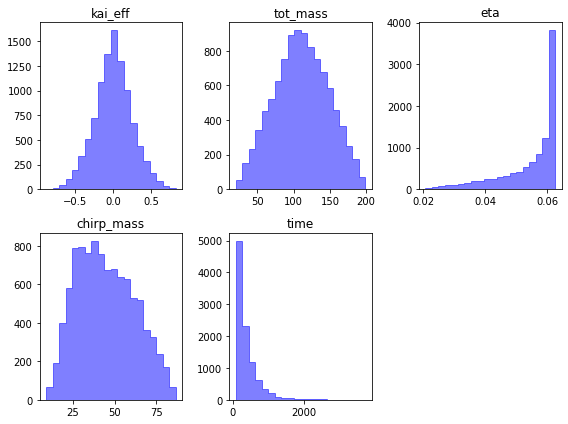

In [33]:
plt.figure(figsize = (8,6))
for i in range(len(keys)):
    plt.subplot(2,3,i+1)
    plt.title(f'{keys[i]}')
    plt.hist(data[keys[i]], edgecolor = 'blue', histtype = 'stepfilled', color = 'blue', alpha = 0.5, bins = 20)
plt.tight_layout()


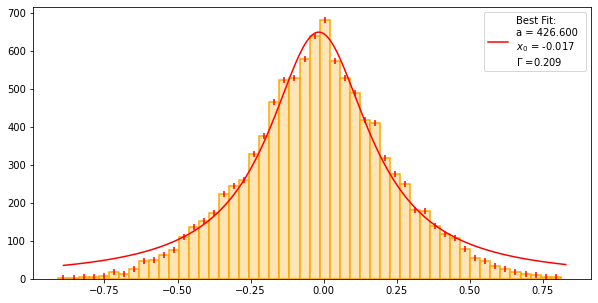

In [105]:
def func(x, a, x0, gamma):
    return (1/np.pi)*a*(gamma/((x-x0)**2 + gamma**2))

plt.figure(figsize = (10,5))
n, bins, patches = plt.hist(data[keys[0]], edgecolor = 'orange', color = 'moccasin'
                            , alpha = 1, bins = 50, align = 'left', lw = 1.5)
popt, pcov = curve_fit(func, bins[0:-1], n)
plt.scatter(bins[0:-1], n, marker = '|', color = 'red')
x = np.linspace(bins.min(), bins.max(),300)
plt.plot(x, func(x, *popt), color = 'red',
         label= 'Best Fit:\na = %5.3f \n$x_0$ = %5.3f   \n$\Gamma$ =%5.3f' % tuple(popt))
plt.legend()
plt.show()